In [1]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.ndimage import affine_transform
import surfa as sf
import matplotlib.colors as mcolors
import seaborn as sns
import os
import json
import sys

In [3]:
subject_id = 'sllip_030'
path=f'/Volumes/Teah2/Gyri_sulci/SG_Outputs/{subject_id}_gy-sulc_Output/'

In [4]:
path

'/Volumes/Teah2/Gyri_sulci/SG_Outputs/sllip_030_gy-sulc_Output/'

In [5]:
mu_volume=nib.load(f'{path}Mu.nii')
mu_with_csf=mu_volume.get_fdata()

In [6]:
csf_volume=nib.load(f'{path}register_nu_csf.nii')
csf=csf_volume.get_fdata()
csf_mask=(csf < .5).astype(int)
nu_volume=nib.load(f'{path}nu_reg.nii')
#nu_volume=nib.load(f'{path}register_nu.nii')
t1=nu_volume.get_fdata()

In [7]:
mu = mu_with_csf*csf_mask

In [8]:
lh_fund_file = nib.load(f'{path}/CrownFund/lh_sulc_fund-reg-nearest.nii')
lh_crown_file = nib.load(f'{path}/CrownFund/lh_gyri_crown-reg-nearest.nii')

rh_crown_file = nib.load(f'{path}/CrownFund/rh_gyri_crown-reg-nearest.nii')
rh_fund_file = nib.load(f'{path}/CrownFund/rh_sulc_fund-reg-nearest.nii')

lh_fund = lh_fund_file.get_fdata()
lh_crown = lh_crown_file.get_fdata()
rh_fund = rh_fund_file.get_fdata()
rh_crown = rh_crown_file.get_fdata()

In [9]:
lh_fund_mu = lh_fund * mu
lh_crown_mu = lh_crown * mu
rh_fund_mu = rh_fund * mu
rh_crown_mu = rh_crown * mu

In [10]:
lh_crown_mu_flat = lh_crown_mu.flatten()
lh_crown_mu_flat[lh_crown_mu_flat == 0] = np.nan

lh_fund_mu_flat = lh_fund_mu.flatten()
lh_fund_mu_flat[lh_fund_mu_flat == 0] = np.nan

rh_crown_mu_flat = rh_crown_mu.flatten()
rh_crown_mu_flat[rh_crown_mu_flat == 0] = np.nan

rh_fund_mu_flat = rh_fund_mu.flatten()
rh_fund_mu_flat[rh_fund_mu_flat == 0] = np.nan

all_fund_mu = np.concatenate([lh_fund_mu_flat, rh_fund_mu_flat])
all_crown_mu = np.concatenate([lh_crown_mu_flat, rh_crown_mu_flat ])


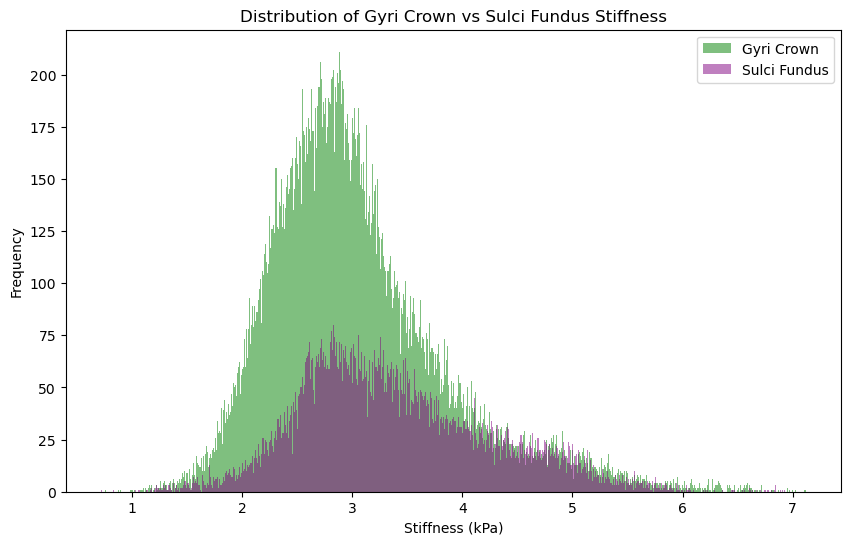

In [11]:
plt.figure(figsize=(10, 6))

plt.hist(all_crown_mu/ 1000, bins=1000, alpha=0.5, label='Gyri Crown', color='Green')
plt.hist(all_fund_mu / 1000, bins=1000, alpha=0.5, label='Sulci Fundus', color='Purple')

plt.legend(loc='best')
plt.xlabel('Stiffness (kPa)')
plt.ylabel('Frequency')
plt.title('Distribution of Gyral Crown and Sulcal Fundus Stiffness')

image_path = f'{path}/FinalOutputs/CrownFund_Histogram.png'
plt.savefig(image_path, dpi=300, bbox_inches='tight')
plt.show()


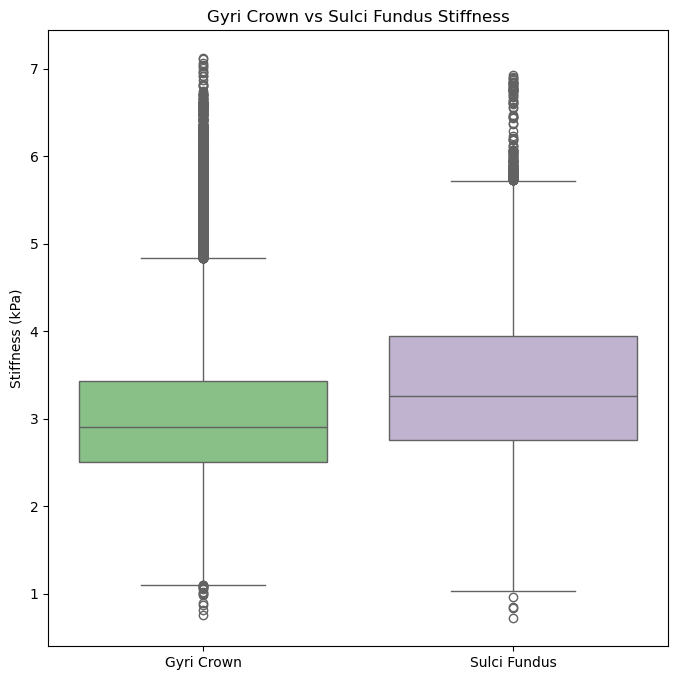

In [12]:
plt.figure(figsize=(8, 8))


sns.boxplot(data=[all_crown_mu/1000, all_fund_mu/1000], palette='Accent')
plt.xticks([0, 1], ['Crown', ' Fundus'])
plt.ylabel('Stiffness (kPa)')

plt.title('Gyral Crown vs Sulcal Fundus Stiffness')
plt.ylabel('Stiffness (kPa)')
image_path = f'{path}/FinalOutputs/CrownFund_Box.png'
plt.savefig(image_path, dpi=300, bbox_inches='tight')
plt.show()


In [13]:
json_path = f'/Volumes/Teah2/Gyri_sulci/SG_Outputs/{subject_id}_gy-sulc_Output/FinalOutputs/averages.json'
with open(json_path, 'r') as f:
            data = json.load(f)

In [14]:
mean_crown = np.nanmean(all_crown_mu)
mean_fund = np.nanmean(all_fund_mu)

Crown Mean: 3054.9885177505307
Fundus Mean: 3395.5618334026767


In [15]:
data

{'subject id ': 'sllip_030',
 'Age': 6,
 'Whole Brain Gyri Stiffness': 3181.164874892611,
 'Whole Brain Sulci Stiffness': 3282.9999352445275,
 'Whole Brain Percent Difference': 3.150756929718694,
 'Whole Brain Absolute Difference': 101.83506035191658,
 'Whole Brain Gyri Sulci Ratio': 0.9689810958390008,
 'Caudal Middle Frontal - Gyri Stiffness': 2781.4101262604663,
 'Caudal Middle Frontal - Sulci Stiffness': 2917.5143630701423,
 'Caudal Middle Frontal - Percent Difference': 4.776488513384836,
 'Caudal Middle Frontal - Absolute Difference': 136.10423680967597,
 'Caudal Middle Frontal - Gyri Sulci Ratio': 0.9533492487535,
 'Precentral - Gyri Stiffness': 2862.3591377404173,
 'Precentral - Sulci Stiffness': 3036.7352644521025,
 'Precentral - Percent Difference': 5.911962576726173,
 'Precentral - Absolute Difference': 174.37612671168517,
 'Precentral - Gyri Sulci Ratio': 0.942577764761741,
 'Rostral Middle Frontal - Gyri Stiffness': 2670.5298086362664,
 'Rostral Middle Frontal - Sulci Stiff

In [16]:
crown_gyri_percent_diff = (abs(mean_crown - mean_fund) / ((mean_crown + mean_fund) / 2)) * 100

In [17]:
crown_gyri_abs_diff = abs(mean_crown - mean_fund) 

In [18]:
crown_gyri_ratio = mean_crown/mean_fund

In [19]:
data['Whole Brain Crown Fundus Percent Difference'] = crown_gyri_percent_diff
data['Whole Brain Crown Fundus Absolute Difference'] = crown_gyri_abs_diff
data['Whole Brain Crown Fundus Ratio'] = crown_gyri_ratio

In [20]:
data

{'subject id ': 'sllip_030',
 'Age': 6,
 'Whole Brain Gyri Stiffness': 3181.164874892611,
 'Whole Brain Sulci Stiffness': 3282.9999352445275,
 'Whole Brain Percent Difference': 3.150756929718694,
 'Whole Brain Absolute Difference': 101.83506035191658,
 'Whole Brain Gyri Sulci Ratio': 0.9689810958390008,
 'Caudal Middle Frontal - Gyri Stiffness': 2781.4101262604663,
 'Caudal Middle Frontal - Sulci Stiffness': 2917.5143630701423,
 'Caudal Middle Frontal - Percent Difference': 4.776488513384836,
 'Caudal Middle Frontal - Absolute Difference': 136.10423680967597,
 'Caudal Middle Frontal - Gyri Sulci Ratio': 0.9533492487535,
 'Precentral - Gyri Stiffness': 2862.3591377404173,
 'Precentral - Sulci Stiffness': 3036.7352644521025,
 'Precentral - Percent Difference': 5.911962576726173,
 'Precentral - Absolute Difference': 174.37612671168517,
 'Precentral - Gyri Sulci Ratio': 0.942577764761741,
 'Rostral Middle Frontal - Gyri Stiffness': 2670.5298086362664,
 'Rostral Middle Frontal - Sulci Stiff

In [21]:
#lh_caudalmiddlefrontal
lh_cmf_volume=nib.load(f'{path}/frontalROI/ctx-lh-caudalmiddlefrontal-reg-nearest.nii')
lh_cmf=lh_cmf_volume.get_fdata()
#lh_frontalpole
lh_fp_volume=nib.load(f'{path}/frontalROI/ctx-lh-frontalpole-reg-nearest.nii')
lh_fp=lh_fp_volume.get_fdata()
#lh_parsorbitalis
lh_po_volume=nib.load(f'{path}/frontalROI/ctx-lh-parsorbitalis-reg-nearest.nii')
lh_po=lh_po_volume.get_fdata()
#lh_precentral
lh_pc_volume=nib.load(f'{path}/frontalROI/ctx-lh-precentral-reg-nearest.nii')
lh_pc=lh_pc_volume.get_fdata()
#lh_rostralmiddlefrontal
lh_rmf_volume=nib.load(f'{path}/frontalROI/ctx-lh-rostralmiddlefrontal-reg-nearest.nii')
lh_rmf=lh_rmf_volume.get_fdata()
#lh-superiorfronta
lh_sf_volume=nib.load(f'{path}/frontalROI/ctx-lh-superiorfrontal-reg-nearest.nii')
lh_sf=lh_sf_volume.get_fdata()

#rh_caudalmiddlefrontal
rh_cmf_volume=nib.load(f'{path}/frontalROI/ctx-rh-caudalmiddlefrontal-reg-nearest.nii')
rh_cmf=rh_cmf_volume.get_fdata()
#rh_frontalpole
rh_fp_volume=nib.load(f'{path}/frontalROI/ctx-rh-frontalpole-reg-nearest.nii')
rh_fp=rh_fp_volume.get_fdata()
#rh_parsorbitalis
rh_po_volume=nib.load(f'{path}/frontalROI/ctx-rh-parsorbitalis-reg-nearest.nii')
rh_po=rh_po_volume.get_fdata()
#rh_precentral
rh_pc_volume=nib.load(f'{path}/frontalROI/ctx-rh-precentral-reg-nearest.nii')
rh_pc=rh_pc_volume.get_fdata()
#rh_rostralmiddlefrontal
rh_rmf_volume=nib.load(f'{path}/frontalROI/ctx-rh-rostralmiddlefrontal-reg-nearest.nii')
rh_rmf=rh_rmf_volume.get_fdata()
#rh-superiorfronta
rh_sf_volume=nib.load(f'{path}/frontalROI/ctx-rh-superiorfrontal-reg-nearest.nii')
rh_sf=rh_sf_volume.get_fdata()

In [22]:
def roi_dict(roi_name, roi_data, crown_mu, fund_mu):
    roi_crown_mu = {}
    roi_fund_mu = {}

    for i in range(len(roi_data)):
        temp = roi_name[i]   
        roi_crown_mu[temp] = crown_mu * roi_data[i]
        roi_fund_mu[temp] = fund_mu * roi_data[i]

    return roi_crown_mu, roi_fund_mu

In [23]:
frontal_roi_name = ['Caudal Middle Frontal', 'Precentral', 'Rostral Middle Frontal', 'Superior Frontal']
lh_frontal_roi_data = [lh_cmf, lh_pc, lh_rmf, lh_sf]
rh_frontal_roi_data = [rh_cmf, rh_pc, rh_rmf, rh_sf]

roi_lh_crown_mu, roi_lh_fund_mu = roi_dict(frontal_roi_name, lh_frontal_roi_data, lh_crown_mu, lh_fund_mu)
roi_rh_crown_mu, roi_rh_fund_mu = roi_dict(frontal_roi_name, rh_frontal_roi_data, rh_crown_mu, rh_fund_mu)


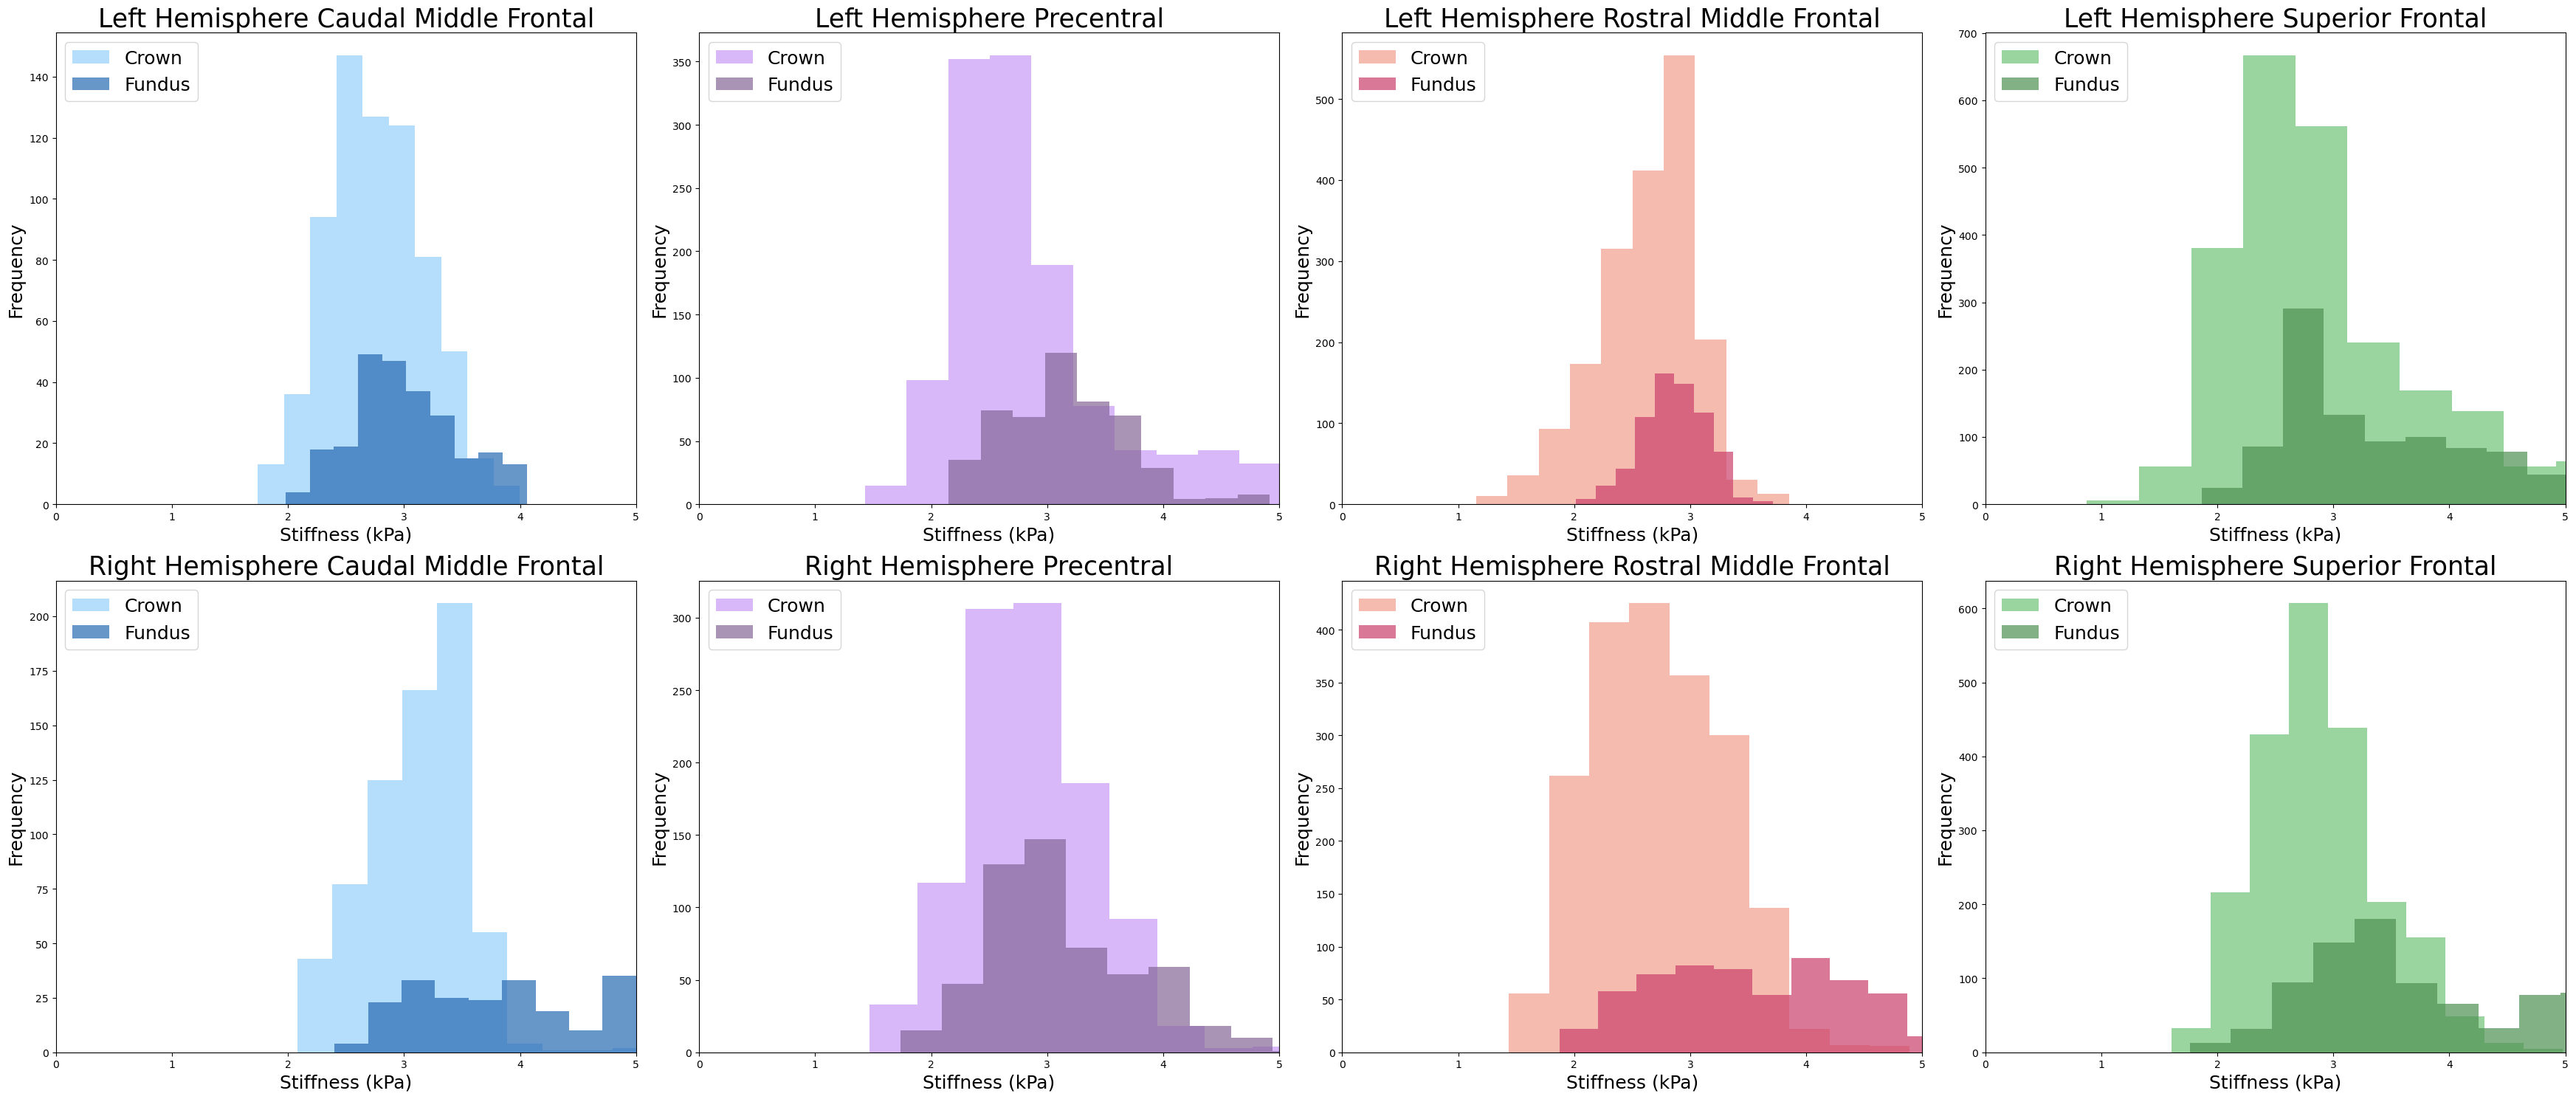

In [29]:
rows = 2
cols = 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(35, 15))
axes = axes.flatten()

crown_counts = []
fund_counts = []

names = ['Caudal Middle Frontal', 'Precentral', 'Rostral Middle Frontal', 'Superior Frontal']

fund_color = ['xkcd:mid blue','xkcd:dark lavender','xkcd:dark pink','xkcd:light forest green']
crown_color = ['xkcd:light blue','xkcd:baby purple','xkcd:blush','xkcd:soft green']

# Left hemisphere
for idx, roi in enumerate(roi_lh_crown_mu.keys()):
    if idx < len(axes):
        crown_flat = roi_lh_crown_mu[roi].flatten()
        crown_flat[crown_flat == 0] = np.nan

        fund_flat = roi_lh_fund_mu[roi].flatten()
        fund_flat[fund_flat == 0] = np.nan
        
        crown_count, _, _ = axes[idx].hist(crown_flat / 1000, bins=10, alpha=0.7, label='Crown', color=crown_color[idx])
        fund_count, _, _ = axes[idx].hist(fund_flat / 1000, bins=10, alpha=0.7, label='Fundus', color=fund_color[idx])

        crown_counts.append(crown_count)
        fund_counts.append(fund_count)

        axes[idx].legend(loc='upper left', fontsize=18)
        axes[idx].set_xlabel('Stiffness (kPa)', fontsize=18)
        axes[idx].set_ylabel('Frequency', fontsize=18)
        axes[idx].set_title(f"Left Hemisphere {names[idx]}", fontsize=25)
        axes[idx].set_xlim(0, 5)

# Right hemisphere
axes = axes[cols:]
for idx, roi in enumerate(roi_rh_crown_mu.keys()):
    if idx < len(axes):
        crown_flat = roi_rh_crown_mu[roi].flatten()
        crown_flat[crown_flat == 0] = np.nan

        fund_flat = roi_rh_fund_mu[roi].flatten()
        fund_flat[fund_flat == 0] = np.nan
        
        crown_count, _, _ = axes[idx].hist(crown_flat / 1000, bins=10, alpha=0.7, label='Crown', color=crown_color[idx])
        fund_count, _, _ = axes[idx].hist(fund_flat / 1000, bins=10, alpha=0.7, label='Fundus', color=fund_color[idx])

        crown_counts.append(crown_count)
        fund_counts.append(fund_count)

        axes[idx].legend(loc='upper left', fontsize=18)
        axes[idx].set_xlabel('Stiffness (kPa)', fontsize=18)
        axes[idx].set_ylabel('Frequency', fontsize=18)
        axes[idx].set_title(f"Right Hemisphere {names[idx]}", fontsize=25)
        axes[idx].set_xlim(0, 5)

plt.tight_layout()
image_path = os.path.join(path, 'FinalOutputs/CrownFund_Frontal_Histogram.png')
plt.savefig(image_path, dpi=300, bbox_inches='tight')

In [25]:
import numpy as np

# Assuming these are already defined:
# roi_lh_gyri_mu, roi_lh_sulci_mu, output_data = {}

for roi in roi_rh_crown_mu.keys():
    # Safely create copies to avoid modifying the original dictionaries
    gyri_data = roi_rh_crown_mu[roi].copy()
    sulci_data = roi_rh_fund_mu[roi].copy()

    gyri_data[gyri_data == 0] = np.nan
    sulci_data[sulci_data == 0] = np.nan

    mean_gyri = np.nanmean(gyri_data)
    mean_sulci = np.nanmean(sulci_data)

    percent_diff = (abs(mean_gyri - mean_sulci) / ((mean_gyri + mean_sulci) / 2)) * 100
    abs_diff = abs(mean_gyri - mean_sulci)
    ratio = mean_gyri/mean_sulci
    
    data[f"Right {roi} - Gyral Crown Stiffness"] = mean_gyri
    data[f"Right {roi} - Sulcal Fundus Stiffness"] = mean_sulci
    data[f"Right {roi} - Crown Fundus Percent Difference"] = percent_diff
    data[f"Right {roi} - Crown Fundus Absolute Difference"] = abs_diff
    data[f"Right {roi} - Crown Fundus Ratio"] = ratio



Gyri Stiffness - Caudal Middle Frontal: 3108.524935142381
Sulci Stiffness - Caudal Middle Frontal: 3908.9467567761394
Percent Difference - Caudal Middle Frontal: 22.812256515563647
Abs Difference - Caudal Middle Frontal: 800.4218216337586
Ratio - Caudal Middle Frontal: 0.7952333783400269
 
Gyri Stiffness - Precentral: 2869.5499735503554
Sulci Stiffness - Precentral: 3120.3946057887924
Percent Difference - Precentral: 8.37552431131548
Abs Difference - Precentral: 250.84463223843704
Ratio - Precentral: 0.9196112466759546
 
Gyri Stiffness - Rostral Middle Frontal: 2721.6011796942967
Sulci Stiffness - Rostral Middle Frontal: 3505.14996720348
Percent Difference - Rostral Middle Frontal: 25.167178485992796
Abs Difference - Rostral Middle Frontal: 783.5487875091835
Ratio - Rostral Middle Frontal: 0.7764578420779172
 
Gyri Stiffness - Superior Frontal: 2886.419976068976
Sulci Stiffness - Superior Frontal: 3604.934566127736
Percent Difference - Superior Frontal: 22.137585780844145
Abs Differenc

In [26]:

for roi in roi_lh_crown_mu.keys():
    # Safely create copies to avoid modifying the original dictionaries
    gyri_data = roi_lh_crown_mu[roi].copy()
    sulci_data = roi_lh_fund_mu[roi].copy()

    gyri_data[gyri_data == 0] = np.nan
    sulci_data[sulci_data == 0] = np.nan

    mean_gyri = np.nanmean(gyri_data)
    mean_sulci = np.nanmean(sulci_data)

    percent_diff = (abs(mean_gyri - mean_sulci) / ((mean_gyri + mean_sulci) / 2)) * 100
    abs_diff = abs(mean_gyri - mean_sulci)
    ratio = mean_gyri/mean_sulci
    data[f"Left {roi} - Gyral Crown Stiffness"] = mean_gyri
    data[f"Left {roi} - Sulcal Fundus Stiffness"] = mean_sulci
    data[f"Left {roi} - Crown Fundus Percent Difference"] = percent_diff
    data[f"Left {roi} - Crown Fundus Absolute Difference"] = abs_diff
    data[f"Leftt {roi} - Crown Fundus Ratio"] = ratio



Gyri Stiffness - Caudal Middle Frontal: 2767.1438843723326
Sulci Stiffness - Caudal Middle Frontal: 3011.8990450826054
Percent Difference - Caudal Middle Frontal: 8.47043926470217
Abs Difference - Caudal Middle Frontal: 244.75516071027278
Ratio - Caudal Middle Frontal: 0.9187372627545821
 
Gyri Stiffness - Precentral: 2812.230021243371
Sulci Stiffness - Precentral: 3165.1214714320195
Percent Difference - Precentral: 11.807619164477089
Abs Difference - Precentral: 352.8914501886484
Ratio - Precentral: 0.8885061905605199
 
Gyri Stiffness - Rostral Middle Frontal: 2630.111228559824
Sulci Stiffness - Rostral Middle Frontal: 2860.191705445626
Percent Difference - Rostral Middle Frontal: 8.381339960705839
Abs Difference - Rostral Middle Frontal: 230.080476885802
Ratio - Rostral Middle Frontal: 0.9195576728483817
 
Gyri Stiffness - Superior Frontal: 2878.5801666888883
Sulci Stiffness - Superior Frontal: 3322.2187649224807
Percent Difference - Superior Frontal: 14.309078656685498
Abs Differenc

In [27]:
data

{'subject id ': 'sllip_030',
 'Age': 6,
 'Whole Brain Gyri Stiffness': 3181.164874892611,
 'Whole Brain Sulci Stiffness': 3282.9999352445275,
 'Whole Brain Percent Difference': 3.150756929718694,
 'Whole Brain Absolute Difference': 101.83506035191658,
 'Whole Brain Gyri Sulci Ratio': 0.9689810958390008,
 'Caudal Middle Frontal - Gyri Stiffness': 2781.4101262604663,
 'Caudal Middle Frontal - Sulci Stiffness': 2917.5143630701423,
 'Caudal Middle Frontal - Percent Difference': 4.776488513384836,
 'Caudal Middle Frontal - Absolute Difference': 136.10423680967597,
 'Caudal Middle Frontal - Gyri Sulci Ratio': 0.9533492487535,
 'Precentral - Gyri Stiffness': 2862.3591377404173,
 'Precentral - Sulci Stiffness': 3036.7352644521025,
 'Precentral - Percent Difference': 5.911962576726173,
 'Precentral - Absolute Difference': 174.37612671168517,
 'Precentral - Gyri Sulci Ratio': 0.942577764761741,
 'Rostral Middle Frontal - Gyri Stiffness': 2670.5298086362664,
 'Rostral Middle Frontal - Sulci Stiff

In [28]:
with open(f'/Volumes/Teah2/Gyri_sulci/SG_Outputs/{subject_id}_gy-sulc_Output/FinalOutputs/averages.json', 'w') as f:
    json.dump(data, f, indent=4)